# Sklearn (Версия Python 3)

## sklearn.datasets

In [6]:
from sklearn import datasets, cross_validation, linear_model, metrics
from matplotlib.colors import ListedColormap

In [7]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов 

In [8]:
clf_data, clf_target = datasets.make_classification(n_features=2, n_informative=2, n_classes=2, n_redundant=0,
                                                   n_clusters_per_class=1, random_state=7)

In [9]:
reg_data, reg_target = datasets.make_regression(n_features=2, n_informative=1, n_targets=1, noise=5., random_state=7)

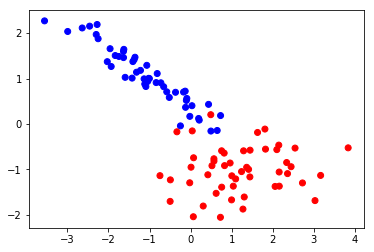

In [15]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(clf_data[:, 0], clf_data[:, 1], c=clf_target, cmap=colors)

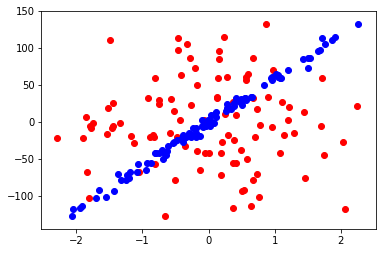

In [17]:
pylab.scatter(reg_data[:, 0], reg_target, color='r')
pylab.scatter(reg_data[:, 1], reg_target, color='b')

In [19]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = cross_validation.train_test_split(clf_data, clf_target,
                                                                                                    test_size=0.3,
                                                                                                    random_state=1)

In [21]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = cross_validation.train_test_split(reg_data, reg_target,
                                                                                                    test_size=0.3,
                                                                                                    random_state=1)

### Метрики качества в задачах классификации

#### Обучение модели классификации 

In [22]:
classifier = linear_model.SGDClassifier(loss='log', random_state=1)

In [23]:
classifier.fit(clf_train_data, clf_train_labels)

C:\Users\vlnlo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [24]:
predictions = classifier.predict(clf_test_data)
probability_predictions = classifier.predict_proba(clf_test_data)

In [25]:
print(clf_test_labels)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [26]:
print(predictions)

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [27]:
print(probability_predictions)

[[0.00000000e+00 1.00000000e+00]
 [9.99999993e-01 6.61556341e-09]
 [9.99988143e-01 1.18567026e-05]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.62314295e-15]
 [3.03803294e-09 9.99999997e-01]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 5.05766731e-13]
 [0.00000000e+00 1.00000000e+00]
 [9.99999999e-01 5.18878464e-10]
 [9.99999241e-01 7.58783839e-07]
 [2.70446065e-04 9.99729554e-01]
 [0.00000000e+00 1.00000000e+00]
 [4.89202012e-11 1.00000000e+00]
 [1.00000000e+00 8.62325525e-11]
 [9.97365075e-01 2.63492515e-03]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.30597714e-15]
 [1.00000000e+00 3.28425090e-15]
 [1.83630888e-13 1.00000000e+00]
 [9.99999999e-01 5.19307103e-10]
 [9.99999639e-01 3.60586359e-07]
 [8.85166610e-01 1.14833390e-01]
 [1.00000000e+00 7.21139609e-14]
 [9.99999415e-01 5.85346707e-07]
 [9.86697401e-01 1.33025990e-02]
 [4.76887024e-02 9.52311298e-01]
 [1.22124533e-14 1.00000000e+00]
 [1.29348512e-03 9.98706515e-01]
 [1.00000000e+00 1.37248174e-13]]


#### accuracy 

In [29]:
sum(1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)) / len(clf_test_labels)

0.9666666666666667

In [30]:
metrics.accuracy_score(clf_test_labels, predictions)

0.9666666666666667

#### confusion matrix 

In [32]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)

[[17  1]
 [ 0 12]]


In [39]:
sum(1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions))

29

In [40]:
matrix.diagonal().sum()

29

#### precision 

In [41]:
metrics.precision_score(clf_test_labels, predictions, pos_label=0)

1.0

In [42]:
metrics.precision_score(clf_test_labels, predictions)

0.9230769230769231

#### recall

In [43]:
metrics.recall_score(clf_test_labels, predictions, pos_label=0)

0.9444444444444444

In [44]:
metrics.recall_score(clf_test_labels, predictions)

1.0

#### f1 

In [45]:
metrics.f1_score(clf_test_labels, predictions, pos_label=0)

0.9714285714285714

In [46]:
metrics.f1_score(clf_test_labels, predictions)

0.9600000000000001

#### classification report 

In [49]:
print(metrics.classification_report(clf_test_labels, predictions))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        18
          1       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        30



#### ROC curve 

In [56]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:, 1])

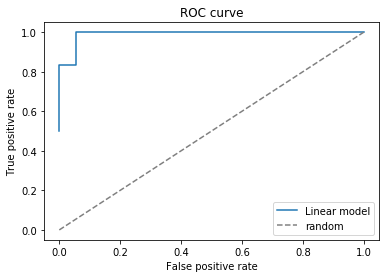

In [57]:
pylab.plot(fpr, tpr, label='Linear model')
pylab.plot([0, 1], [0, 1], '--', color='gray', label='random')
pylab.xlim([-.05, 1.05])
pylab.ylim([-.05, 1.05])
pylab.xlabel('False positive rate')
pylab.ylabel('True positive rate')
pylab.title('ROC curve')
pylab.legend(loc='lower right')

#### ROC AUC 

In [61]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.9722222222222222

In [62]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:, 1])

0.9907407407407407

#### PR AUC 

In [63]:
metrics.average_precision_score(clf_test_labels, predictions)

0.9230769230769231

In [64]:
metrics.log_loss(clf_test_labels, probability_predictions[:, 1])

0.2801206244766808

### Метрики качества в задачах регрессии 

In [65]:
regressor = linear_model.SGDRegressor(random_state=1, n_iter=20)

In [66]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=20, penalty='l2',
       power_t=0.25, random_state=1, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [67]:
reg_predictions = regressor.predict(reg_test_data)

In [68]:
print(reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [83]:
print(reg_predictions)

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551
 -78.9843398   84.80190097  14.80638314  22.91302375 -89.63572717
  14.5954632   31.64431951  95.81031534  21.5037679  -43.1101736
 -95.06972123  86.70086546   0.47837761 -16.44594704 -22.72581879]


#### Mean absolute error (MAE) 

In [70]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.748761311885298

#### Mean squared error (MSE) 

In [71]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

24.114925597460914

#### Root mean squared error (RMSE) 

In [73]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.91069502183356

#### R2 score 

In [74]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.989317615054695